# Construction Investments and Trends
## January 2002 - February 2014
### By Tim Hulak

<a id='conclusion'></a>

# Conclusion

*Seeing as this is time-series data, the primary tool for visualization was the standard line chart for data exploration and statistical modeling. 



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to the below analysis, the [total construction investment trend](#model) showed consistent peaks in the month of August and consistent valleys in the months of January and February. Investment was steadily rising (higher highs and higher lows) until near the end of 2007; it showed **Additive Seasonality** from 2002 - 2007, began to seasonally decline from 2007 - 2011 (lower highs and lower lows), then begin to seasonally increase again from 2011 - 2014 ([Fig. 1](#fig1)). **Statistical modeling** of the total construction using a **multiplicative model** supports this trend and seasonality ([Fig. 8 - Fig. 26](#model)). A possible **hypothesis** for why this may be the case is that construction investment was affected by the financial crisis of 2008 and the recovery that followed. In other words: when the financial crisis hit, less investment was made in construction and once the crisis began to resolve, investment slowly began to increase again. Public construction seemed to be far more consistent than private construction ([Fig. 2](#fig2) and [Fig. 3](#fig3)), meaning that most of the public construction investment trends were essentially flat from 2002 - 2014. The largest [sectors of investment](#sec_invest) across the time span were [Educational](#ed) (*15.5%*), [Highway and Street](#hs) (*13.2%*), [Commercial](#com) (*11.3%*), and [Power](#pwr) (*11.6%*). Over *50%* of the **public** construction was made up of *Highway and Stree* and *Educational* (*28%* and *27%*, respectively). As for **private** construction, nearly *40%* of private investments were *Commercial* and *Power* (*20%* and *19%*, respectively) ([Fig. 6](#fig6) and [Fig. 7](#fig7)). The strongest negative trend was [Religious](#rel) and the strongest positive trend was [Transportation](#trans). All other trends seemed to follow the rising and falling of the [total construction investment trend](#model). 

---

# Table of Conents
- [About the Data](#about)
- [Objectives](#objectives)
- [Data Previews](#previews)
- [Data Queries](#queries)
- [Visualizations](#viz)
- [Segmentation Analysis](#segment)
- [Statistical Modeling of the Data](#model)
    - [Modeling Plot Guide](#model_plot_guide)
- [Sector Trend Modeling](#sector_models)

---

<a id='about'></a>

[Back to the Top](#conclusion)
## About the Data
- The Data series comes from the **U.S. Census Bureau**
- There are 4 tables within the eitre data set
- There were **no missing values** in any of the indivisual tables
- The 'Raw Data' Tab has construction put-in-place **investment values**
- Once the data was merged, it contained **41,280 observations of 11 variables**

### Data Dictionary
#### Raw Data
- **per_idx** (*INT*): FOREIGN KEY to Time Periods table
- **cat_idx** (*INT*): FOREIGN KEY to Categories table
- **dt_idx** (*INT*): FOREIGN KEY to Data Types table
- **val** (*FLOAT*): Dollar amount or percentage

#### Categories
- **cat_idx** (*INT*): PRIMARY KEY/ID
- **cat_code** (*VARCHAR*): Code to identify the category
- **cat_desc** (*VARCHAR*): Category description
- **cat_indent** (*INT*): Code to define a rollup label or true category

#### Data Types
- **dt_idx** (*INT*): PRIMARY KEY/ID
- **dt_code** (*VARCHAR*): Code to identify the data type
- **dt_desc** (*VARCHAR*): Data type description
- **dt_unit** (*VARCHAR*): Code for dollars in millions or percentage

#### Time Periods
- **per_idx** (*INT*): PRIMARY KEY/ID
- **per_name** (*DATE*): Date identifier for a given month

---

<a id='objectives'></a>

## Objectives

1. Analyze and describe the most **noteworthy trends** that have occurred in construction between January 2002 and February 2014. Where applicable, share any hypotheses as to drivers of given trend(s).	

2. Use charts and/or graphs to summarize and visualize your findings



[Back to the Top](#conclusion)

---

# Analysis & Trends

### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as db

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.family':'Georgia'})

# Connect to Database
conn = db.connect('construction.db')

# Define Query Function
def query(sql):
    return pd.read_sql(sql,con=conn, parse_dates=["Period"])

### Read in Data

In [2]:
raw_data = pd.read_excel('Analyst Interview Case Study.xlsx', sheet_name='Raw Data')
categories = pd.read_excel('Analyst Interview Case Study.xlsx', sheet_name='Categories')
data_types = pd.read_excel('Analyst Interview Case Study.xlsx', sheet_name='Data Types')
time_periods = pd.read_excel('Analyst Interview Case Study.xlsx', sheet_name='Time Periods')

In [3]:
time_periods.dtypes

per_idx              int64
per_name    datetime64[ns]
dtype: object

<a id='previews'></a>

### Data Previews, Shape, and Missing Data
[Back to the Top](#conclusion)

In [4]:
# Data preview report
for data in [raw_data,categories,data_types,time_periods]:
    display(data.head(10))
    print(f"\nData Shape: {data.shape}\n")
    print("Missing Values:")
    print(data.isnull().sum())
    print("--------------------------------------------------------------------------\n")

,per_idx,cat_idx,dt_idx,val
0,1,1,1,59516.00000
1,1,1,2,45273.00000
2,1,1,3,14243.00000
3,1,2,1,25972.00000
4,1,2,2,25572.00000
5,1,2,3,400.00000
6,1,3,1,33545.00000
7,1,3,2,19701.00000
8,1,3,3,13844.00000
9,1,4,1,989.00000



Data Shape: (41280, 4)

Missing Values:
per_idx    0
cat_idx    0
dt_idx     0
val        0
dtype: int64
--------------------------------------------------------------------------



,cat_idx,cat_code,cat_desc,cat_indent
0,1,XXXX,Total Construction,0
1,2,00XX,Residential,0
2,3,NRXX,Nonresidential,0
3,4,01XX,Lodging,1
4,5,02XX,Office,1
5,6,03XX,Commercial,1
6,7,04XX,Health Care,1
7,8,05XX,Educational,1
8,9,06XX,Religious,1
9,10,07XX,Public Safety,1



Data Shape: (38, 4)

Missing Values:
cat_idx       0
cat_code      0
cat_desc      0
cat_indent    0
dtype: int64
--------------------------------------------------------------------------



,dt_idx,dt_code,dt_desc,dt_unit
0,1,T,Total Construction,MLN$
1,2,V,Total Private Construction,MLN$
2,3,P,Total Public Construction,MLN$
3,4,MPCT,Monthly Percent Change for Total Construction,PCT
4,5,MPCV,Monthly Percent Change for Private Construction,PCT
5,6,MPCP,Monthly Percent Change for Public Construction,PCT



Data Shape: (6, 4)

Missing Values:
dt_idx     0
dt_code    0
dt_desc    0
dt_unit    0
dtype: int64
--------------------------------------------------------------------------



,per_idx,per_name
0,1,2002-01-01
1,2,2002-02-01
2,3,2002-03-01
3,4,2002-04-01
4,5,2002-05-01
5,6,2002-06-01
6,7,2002-07-01
7,8,2002-08-01
8,9,2002-09-01
9,10,2002-10-01



Data Shape: (146, 2)

Missing Values:
per_idx     0
per_name    0
dtype: int64
--------------------------------------------------------------------------



### JOIN Data into one table

In [5]:
join_1 = pd.merge(raw_data, categories, on ='cat_idx',how ='left')
join_2 = pd.merge(join_1, data_types, on ='dt_idx',how ='left')
joined_data = pd.merge(join_2, time_periods, on ='per_idx',how ='left')

In [6]:
# send Joined Data to a local SQLite database for easier querying
joined_data.to_sql('data', con=conn,if_exists='replace')

<a id='queries'></a>

### Data Queries 
[Back to the Top](#conclusion)

In [8]:
#### Dollars
# Total Construction
total_construction_dollars = query(
    """
    SELECT 
        per_name AS Period
        ,val AS Dollar
    FROM 
        data
    WHERE
        cat_code = 'XXXX'
    AND
        dt_code = 'T'
    AND 
        dt_unit = 'MLN$'
    """)

# Total Construction: Private vs Public
total_construction_private_public = query("""
    SELECT
        per_name AS Period
        , dt_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE
        dt_code IN ('V','P')
    AND
        cat_code = 'XXXX'
    AND
       cat_indent = 0 
    AND 
        dt_unit = 'MLN$'
""")

# Investment by Category: Residential vs Nonresidential
total_construction_res_non_res = query("""
    SELECT
        per_name AS Period
        , cat_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE 
        cat_code IN ('NRXX','00XX')
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
    AND
        cat_indent = 0
        
""")

# Investment by Category: Private and Public Residential vs Nonresidential
total_construction_res_non_res_pvt_pbc = query("""
    SELECT
        per_name AS Period
        , dt_desc ||' ' || cat_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE 
        cat_code IN ('NRXX','00XX')
    AND
        dt_code IN ('V','P')
    AND
        dt_unit = 'MLN$'
    AND
        cat_indent = 0
        
""")


####### Segmentation in Dollars
segments = query("""
    SELECT 
        per_name AS Period
        , cat_desc AS Sector
        , val AS Dollar
    FROM
        data
    WHERE 
        cat_indent != 0
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
    AND
        cat_desc NOT LIKE 'Annual Rate%'
""")

segments_private_public = query("""
    SELECT 
        per_name AS Period
        , cat_desc AS Sector
        , dt_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE 
        cat_indent != 0
    AND
        dt_code IN ('P','V')
    AND
        dt_unit = 'MLN$'
    AND
        cat_desc NOT LIKE 'Annual Rate%'
""")


####### Percentages
# Total Construction Percent Change
total_construction_pct_change = query("""
    SELECT 
        per_name AS Period
        , val AS Pct
    FROM
        data
    WHERE
       dt_unit = 'PCT' 
    AND
        cat_code = 'XXXX'
    AND
        dt_code = 'MPCT'
    AND
        cat_indent = 0
""")

####### Rates
total_construction_rates = query("""
    SELECT 
        per_name AS Period
        , val AS Rate
    FROM 
        data
    WHERE 
        cat_code = 'AXXXX'
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
""")

####### Residential vs Non Residential
residential = query("""
    SELECT
        per_name AS Period
        , dt_desc 
        , val AS Dollar
    FROM
        data
    WHERE
        cat_code = '00XX'
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
""")

non_residential = query("""
    SELECT
        per_name AS Period
        , dt_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE
        cat_code = 'NRXX'
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
""")

res_non_res = query("""
    SELECT
        per_name AS Period
        , dt_desc AS Category
        , val AS Dollar
    FROM
        data
    WHERE
        cat_code IN ('NRXX','00XX')
    AND
        dt_code = 'T'
    AND
        dt_unit = 'MLN$'
""")

<a id='viz'></a>

# Visualizations

[Back to the Top](#conclusion)

<a id='fig1'></a>

#### Fig 1. Total Construction Analysis
[Back to the Top](#conclusion)

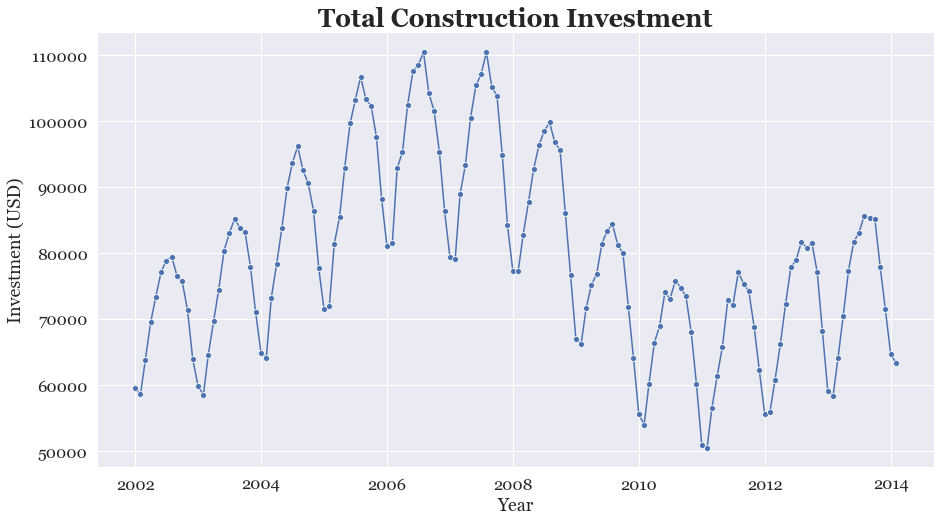

In [9]:
plt.figure(figsize=(15,8))
sns.lineplot(data=total_construction_dollars, x="Period", y="Dollar", marker="o", ci=None).set_title(
  'Total Construction Investment',fontdict = { 'fontsize': 25,'fontweight':'bold'})
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.show()

<a id='fig2'></a>

#### Fig 2. Total Construction: Private vs. Public
[Back to the Top](#conclusion)

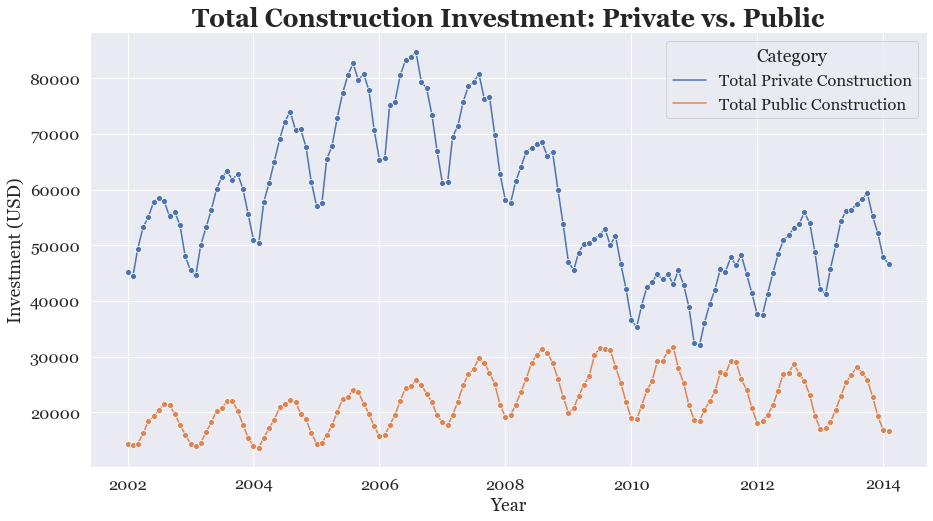

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(data=total_construction_private_public, x="Period", y="Dollar", hue="Category", marker="o", ci=None).set_title(
  'Total Construction Investment: Private vs. Public', fontdict = { 'fontsize': 25,'fontweight':'bold'})
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.show()

<a id='fig3'></a>

#### Fig. 3: Totals for  Residential vs. Non-Residential
[Back to the Top](#conclusion)

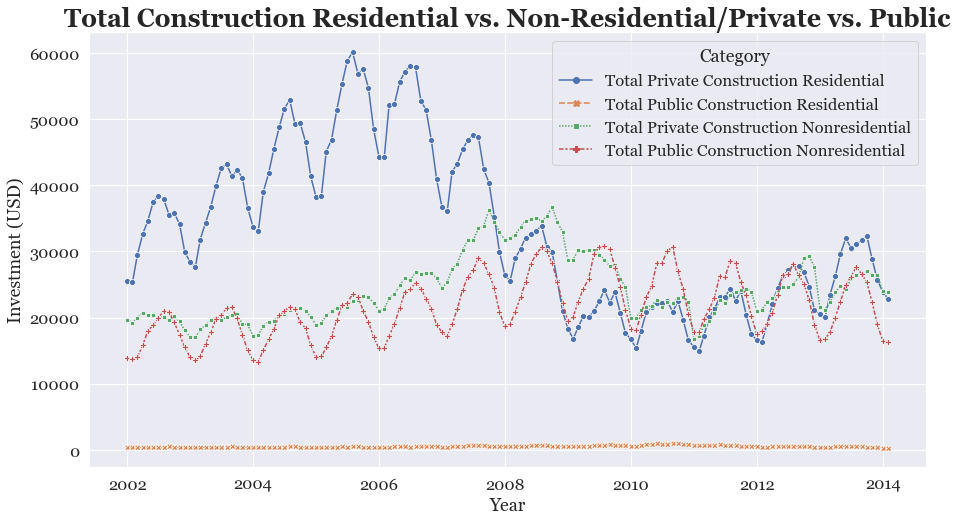

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=total_construction_res_non_res_pvt_pbc, x="Period", y="Dollar", hue="Category", markers=True, style="Category", ci=None).set_title(
  'Total Construction Residential vs. Non-Residential/Private vs. Public', fontdict = { 'fontsize': 25,'fontweight':'bold'})
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.show()

<a id='segment'></a>

## Segmentation Analysis
[Back to the Top](#conclusion)

In [12]:
# Seperate data for clearer plotting
Lodging = segments.loc[segments['Sector'] == 'Lodging']
Office = segments.loc[segments['Sector'] == 'Office']
Commercial = segments.loc[segments['Sector'] == 'Commercial']
Health_Care = segments.loc[segments['Sector'] == 'Health Care']
Educational = segments.loc[segments['Sector'] == 'Educational']
Religious = segments.loc[segments['Sector'] == 'Religious']
Public_Safety = segments.loc[segments['Sector'] == 'Public Safety']
Amusement_and_Recreation = segments.loc[segments['Sector'] == 'Amusement and Recreation']
Transportation = segments.loc[segments['Sector'] == 'Transportation']
Communication = segments.loc[segments['Sector'] == 'Communication']
Power = segments.loc[segments['Sector'] == 'Power']
Highway_and_Street = segments.loc[segments['Sector'] == 'Highway and Street']
Sewage_and_Waste_Disposal = segments.loc[segments['Sector'] == 'Sewage and Waste Disposal']
Water_Supply = segments.loc[segments['Sector'] == 'Water Supply']
Conservation_and_Development = segments.loc[segments['Sector'] == 'Conservation and Development']
Manufacturing = segments.loc[segments['Sector'] == 'Manufacturing']


# Seperate data for clearer plotting
Lodging_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Lodging']
Office_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Office']
Commercial_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Commercial']
Health_Care_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Health Care']
Educational_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Educational']
Religious_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Religious']
Public_Safety_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Public Safety']
Amusement_and_Recreation_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Amusement and Recreation']
Transportation_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Transportation']
Communication_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Communication']
Power_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Power']
Highway_and_Street_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Highway and Street']
Sewage_and_Waste_Disposal_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Sewage and Waste Disposal']
Water_Supply_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Water Supply']
Conservation_and_Development_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Conservation and Development']
Manufacturing_PP = segments_private_public.loc[segments_private_public['Sector'] == 'Manufacturing']

#### Fig. 4: Totals Sectors
<a id='fig4'></a>
[Back to the Top](#conclusion)

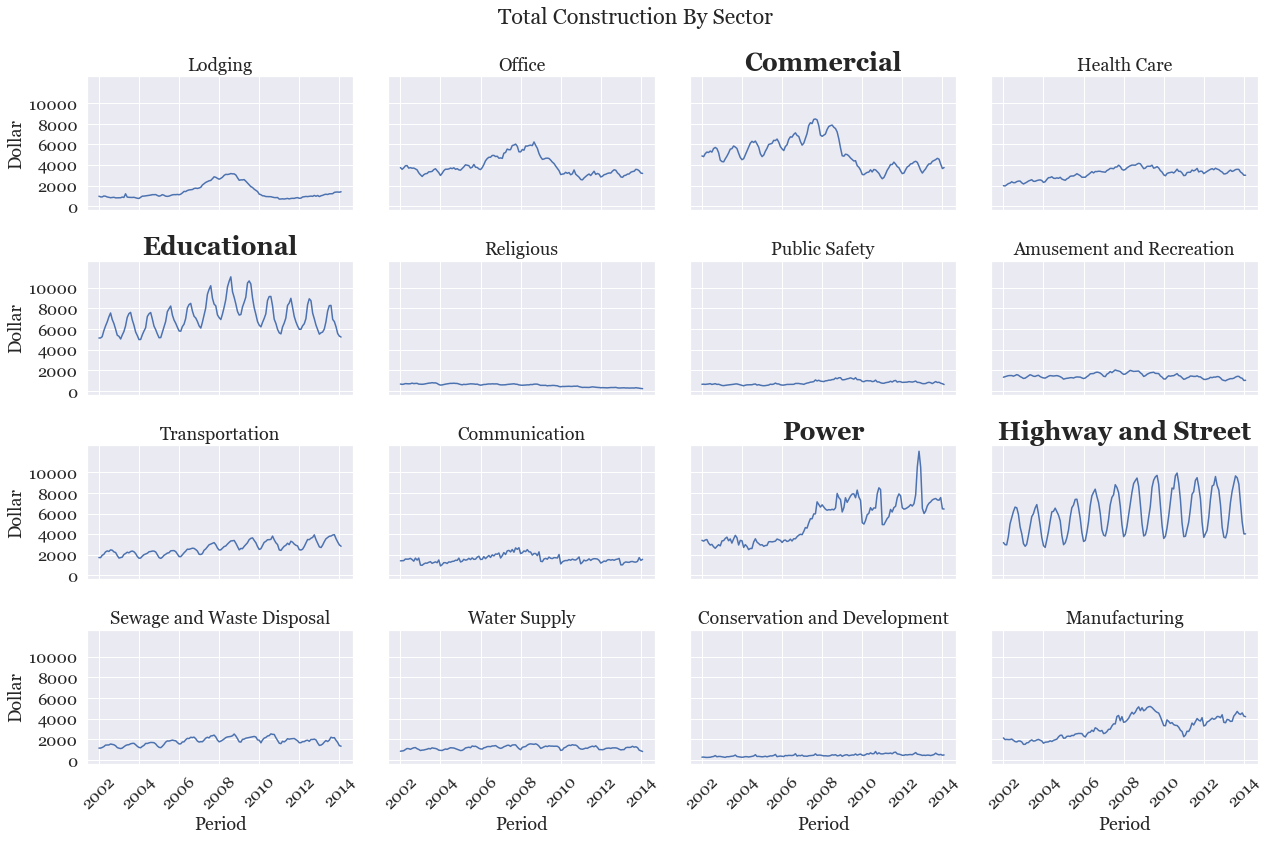

In [13]:
fig, axes = plt.subplots(4, 4, sharey=True, sharex=True,figsize=(18,12))
fig.suptitle('Total Construction By Sector')

### Row 1
# Lodging
sns.lineplot(ax=axes[0,0], x=Lodging.Period, y=Lodging.Dollar)
axes[0,0].set_title('Lodging')

# Office
sns.lineplot(ax=axes[0,1], x=Office.Period, y=Office.Dollar)
axes[0,1].set_title('Office')

# Commercial
sns.lineplot(ax=axes[0,2], x=Commercial.Period, y=Commercial.Dollar)
axes[0,2].set_title('Commercial', fontdict={'fontsize':25, 'fontweight':'bold'})

# Health Care
sns.lineplot(ax=axes[0,3], x=Health_Care.Period, y=Health_Care.Dollar)
axes[0,3].set_title('Health Care')

### Row 2
# Educational
sns.lineplot(ax=axes[1,0], x=Educational.Period, y=Educational.Dollar)
axes[1,0].set_title('Educational', fontdict={'fontsize':25, 'fontweight':'bold'})

# Religious
sns.lineplot(ax=axes[1,1], x=Religious.Period, y=Religious.Dollar)
axes[1,1].set_title('Religious')

# Public Safety
sns.lineplot(ax=axes[1,2], x=Public_Safety.Period, y=Public_Safety.Dollar)
axes[1,2].set_title('Public Safety')

# Amusement and Recreation
sns.lineplot(ax=axes[1,3], x=Amusement_and_Recreation.Period, y=Amusement_and_Recreation.Dollar)
axes[1,3].set_title('Amusement and Recreation')

### Row 3
# Transportation
sns.lineplot(ax=axes[2,0], x=Transportation.Period, y=Transportation.Dollar)
axes[2,0].set_title('Transportation')

# Communication
sns.lineplot(ax=axes[2,1], x=Communication.Period, y=Communication.Dollar)
axes[2,1].set_title('Communication')

# Power
sns.lineplot(ax=axes[2,2], x=Power.Period, y=Power.Dollar)
axes[2,2].set_title('Power', fontdict={'fontsize':25, 'fontweight':'bold'})

# Highway and Street
sns.lineplot(ax=axes[2,3], x=Highway_and_Street.Period, y=Highway_and_Street.Dollar)
axes[2,3].set_title('Highway and Street', fontdict={'fontsize':25, 'fontweight':'bold'})

### Row 4
# Sewage and Waste Disposal
sns.lineplot(ax=axes[3,0], x=Sewage_and_Waste_Disposal.Period, y=Sewage_and_Waste_Disposal.Dollar)
axes[3,0].set_title('Sewage and Waste Disposal')

# Water Supply
sns.lineplot(ax=axes[3,1], x=Water_Supply.Period, y=Water_Supply.Dollar)
axes[3,1].set_title('Water Supply')

# Conservation and Development
sns.lineplot(ax=axes[3,2], x=Conservation_and_Development.Period, y=Conservation_and_Development.Dollar)
axes[3,2].set_title('Conservation and Development')

# Manufacturing
sns.lineplot(ax=axes[3,3], x=Manufacturing.Period, y=Manufacturing.Dollar)
axes[3,3].set_title('Manufacturing')

# Formatting
for i in range(4):
    for j in range(4):
        axes[i,j].tick_params(axis='x', rotation=45)
        axes[i,j].set_yticks(np.arange(0, 11000, 2000))

plt.tight_layout()
plt.show()

<a id='sec_invest'></a>

#### Fig 5. Sector Investment
[Back to the Top](#conclusion)

<a id='fig5'></a>

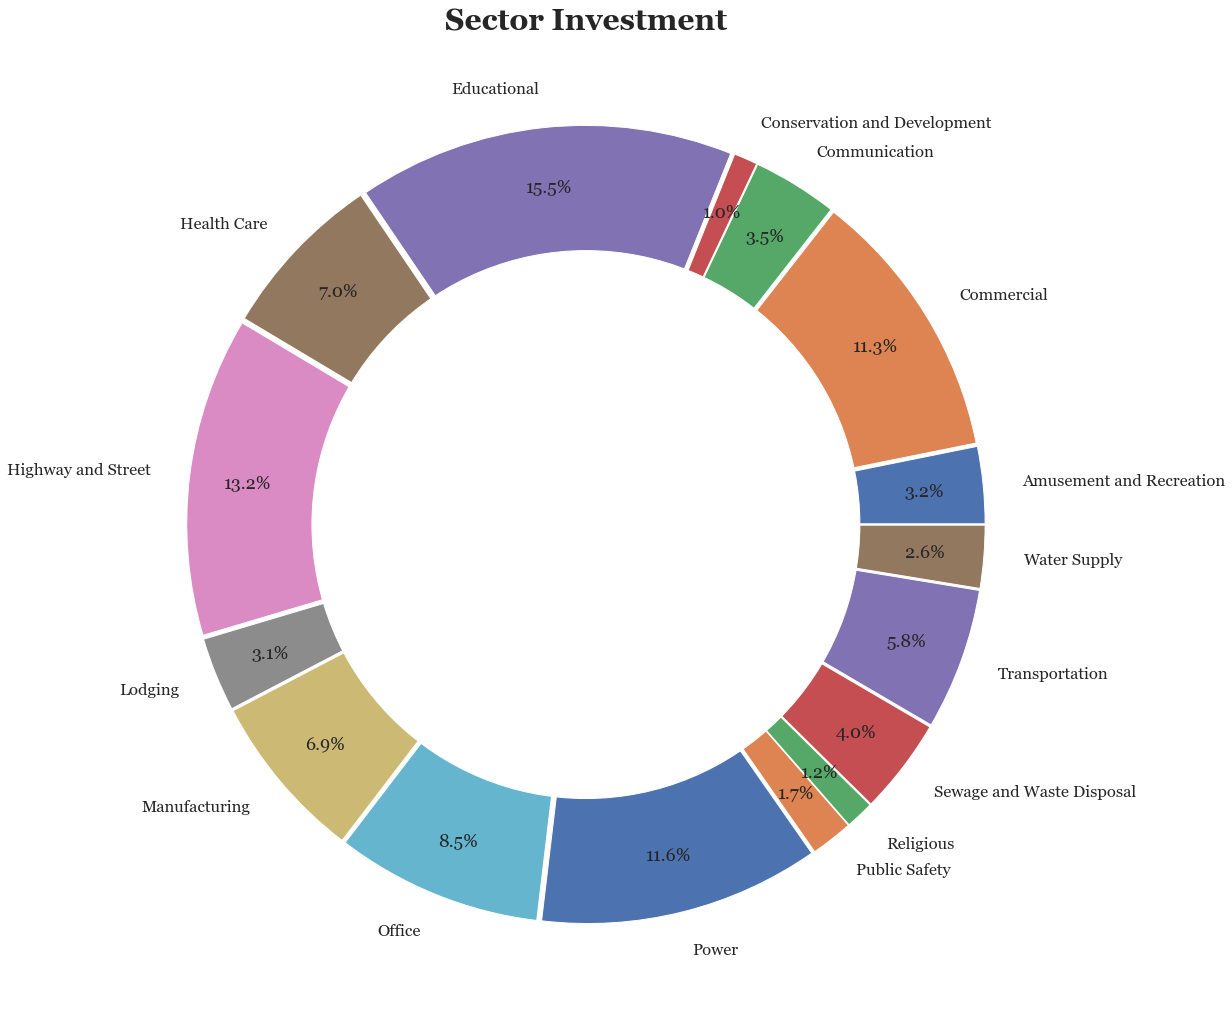

In [14]:
plt.figure(figsize=(20,18))
donut_data = segments.groupby(['Sector']).sum().reset_index()

sectors = list(donut_data['Sector'])
dollars = list(donut_data['Dollar'])

explode = [0.02]*16

plt.pie(dollars, labels=sectors,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.title('Sector Investment', fontdict={'fontsize':30, 'fontweight':'bold'})

plt.show()

#### Fig 6. Sector: Private vs. Public
[Back to the Top](#conclusion)

<a id='fig6'></a>

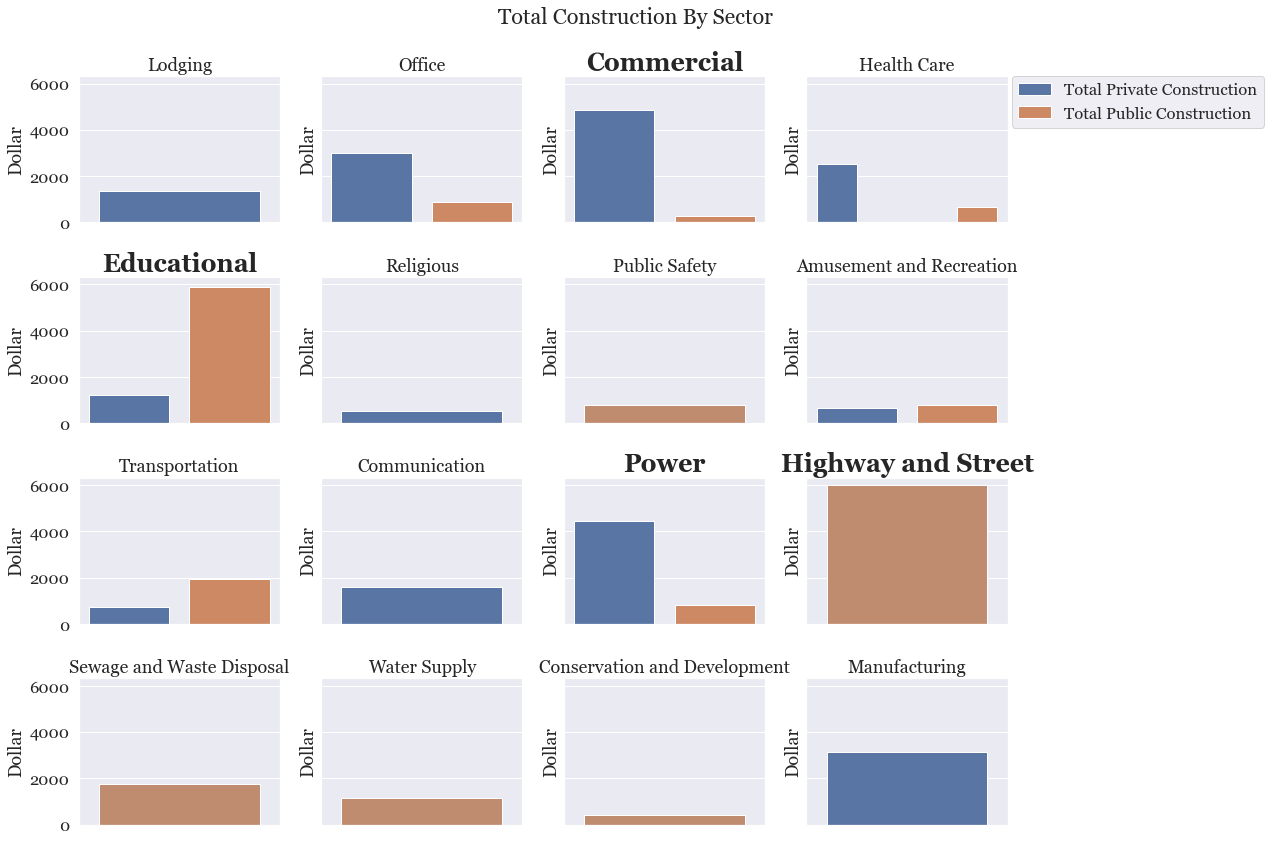

In [15]:
fig, axes = plt.subplots(4, 4, sharey=True, sharex=False,figsize=(18,12))
fig.suptitle('Total Construction By Sector')


### Row 1
# Lodging
sns.barplot(ax=axes[0,0], x=Lodging_PP.Category, y=Lodging_PP.Dollar, ci=None)
axes[0,0].set_title('Lodging')

# Office
sns.barplot(ax=axes[0,1], x=Office_PP.Category, y=Office_PP.Dollar, ci=None)
axes[0,1].set_title('Office')

# Commercial
sns.barplot(ax=axes[0,2], x=Commercial_PP.Category, y=Commercial_PP.Dollar, ci=None)
axes[0,2].set_title('Commercial', fontdict={'fontsize':25, 'fontweight':'bold'})

# Health Care
sns.barplot(ax=axes[0,3], x=Health_Care_PP.Category, y=Health_Care_PP.Dollar, hue = Health_Care_PP.Category, ci=None)
axes[0,3].set_title('Health Care')
axes[0,3].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Row 2
# Educational
sns.barplot(ax=axes[1,0], x=Educational_PP.Category, y=Educational_PP.Dollar, ci=None)
axes[1,0].set_title('Educational', fontdict={'fontsize':25, 'fontweight':'bold'})

# Religious
sns.barplot(ax=axes[1,1], x=Religious_PP.Category, y=Religious_PP.Dollar, ci=None)
axes[1,1].set_title('Religious')

# Public Safety
sns.barplot(ax=axes[1,2], x=Public_Safety_PP.Category, y=Public_Safety_PP.Dollar, color='#cc8863', ci=None)
axes[1,2].set_title('Public Safety')

# Amusement and Recreation
sns.barplot(ax=axes[1,3], x=Amusement_and_Recreation_PP.Category, y=Amusement_and_Recreation_PP.Dollar, ci=None)
axes[1,3].set_title('Amusement and Recreation')

### Row 3
# Transportation
sns.barplot(ax=axes[2,0], x=Transportation_PP.Category, y=Transportation_PP.Dollar, ci=None)
axes[2,0].set_title('Transportation')

# Communication
sns.barplot(ax=axes[2,1], x=Communication_PP.Category, y=Communication_PP.Dollar, ci=None)
axes[2,1].set_title('Communication')

# Power
sns.barplot(ax=axes[2,2], x=Power_PP.Category, y=Power_PP.Dollar, ci=None)
axes[2,2].set_title('Power', fontdict={'fontsize':25, 'fontweight':'bold'})

# Highway and Street
sns.barplot(ax=axes[2,3], x=Highway_and_Street_PP.Category, y=Highway_and_Street_PP.Dollar, color='#cc8863',  ci=None)
axes[2,3].set_title('Highway and Street', fontdict={'fontsize':25, 'fontweight':'bold'})

### Row 4
# Sewage and Waste Disposal
sns.barplot(ax=axes[3,0], x=Sewage_and_Waste_Disposal_PP.Category, y=Sewage_and_Waste_Disposal_PP.Dollar, color='#cc8863', ci=None)
axes[3,0].set_title('Sewage and Waste Disposal')

# Water Supply
sns.barplot(ax=axes[3,1], x=Water_Supply_PP.Category, y=Water_Supply_PP.Dollar, color='#cc8863',  ci=None)
axes[3,1].set_title('Water Supply')

# Conservation and Development
sns.barplot(ax=axes[3,2], x=Conservation_and_Development_PP.Category, y=Conservation_and_Development_PP.Dollar, color='#cc8863', ci=None)
axes[3,2].set_title('Conservation and Development')

# Manufacturing
sns.barplot(ax=axes[3,3], x=Manufacturing_PP.Category, y=Manufacturing_PP.Dollar, ci=None)
axes[3,3].set_title('Manufacturing')

# Formatting
for i in range(4):
    for j in range(4):
        axes[i,j].set_yticks(np.arange(0, 8000, 2000))
        axes[i,j].axes.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()

<a id='fig7'></a>

#### Fig 7. Percentage of Segments
[Back to the Top](#conclusion)

In [16]:
grouped_segments = segments_private_public.groupby(by=['Category','Sector']).sum().reset_index()
grouped_segments_private = grouped_segments.loc[grouped_segments['Category'] == 'Total Private Construction']
grouped_segments_public = grouped_segments.loc[grouped_segments['Category'] == 'Total Public Construction']

grouped_segments_public['Pct Total'] = round(grouped_segments_public['Dollar'] / grouped_segments_public['Dollar'].sum(), 2)
grouped_segments_private['Pct Total'] = round(grouped_segments_private['Dollar'] / grouped_segments_private['Dollar'].sum(), 2)

del grouped_segments_public['Category']
del grouped_segments_private['Category']

print("Public Construction Investment")
display(grouped_segments_public.sort_values(by='Pct Total',ascending=False))

print("-----------------------------------------------------------\n")

print("Private Construction Investment")
display(grouped_segments_private.sort_values(by='Pct Total',ascending=False))


Public Construction Investment


,Sector,Dollar,Pct Total
16,Highway and Street,878687.00000,0.28000
14,Educational,858718.00000,0.27000
21,Transportation,282283.00000,0.09000
20,Sewage and Waste Disposal,259542.00000,0.08000
22,Water Supply,166959.00000,0.05000
11,Amusement and Recreation,116188.00000,0.04000
17,Office,128751.00000,0.04000
18,Power,122181.00000,0.04000
19,Public Safety,112828.00000,0.04000
15,Health Care,98781.00000,0.03000


-----------------------------------------------------------

Private Construction Investment


,Sector,Dollar,Pct Total
1,Commercial,711966.00000,0.20000
8,Power,652305.00000,0.19000
6,Manufacturing,458852.00000,0.13000
7,Office,440417.00000,0.12000
4,Health Care,366269.00000,0.10000
2,Communication,233769.00000,0.07000
5,Lodging,197903.00000,0.06000
3,Educational,180949.00000,0.05000
0,Amusement and Recreation,95843.00000,0.03000
10,Transportation,108580.00000,0.03000


<a id='model'></a>

## Statistical Modeling of the Data
[Back to the Top](#conclusion)

#### Fig. 8: Trend and Seasinality of the Total Construction

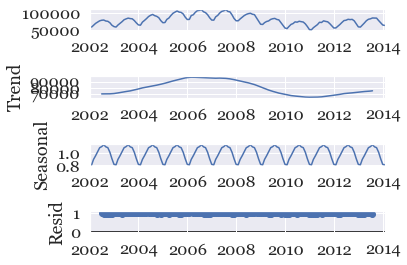

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

total_construction_dollars.set_index('Period', inplace=True)

analysis = total_construction_dollars[['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();


<a id='model_plot_guide'></a>

#### Modeling Plot Guide:
[Back to the Top](#conclusion)
- **Top**: Shape of the data is standard line chart
- **Trend**: The shape of the overall trend of the data
- **Seasonal**: The seasonality of the data
- **Resid**: Residual plot

#### Fig. 9: Trend and Seasinality of the Total Prvate Construction

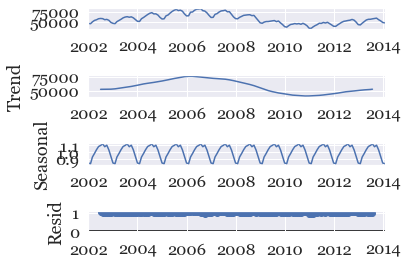

In [18]:
total_construction_private = total_construction_private_public.loc[total_construction_private_public['Category'] == 'Total Private Construction']
total_construction_public = total_construction_private_public.loc[total_construction_private_public['Category'] == 'Total Public Construction']

total_construction_private.set_index('Period', inplace=True)

analysis = total_construction_private[['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

#### Fig. 10: Trend and Seasinality of the Total Prvate Construction

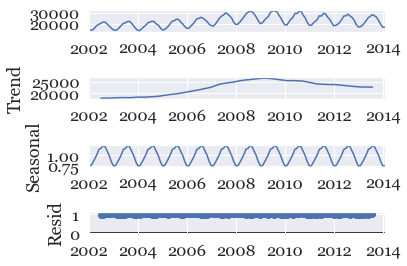

In [19]:
total_construction_public.set_index('Period', inplace=True)

analysis = total_construction_public[['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

<a id='sector_models'></a>

### Sector Trend Modeling
[Back to the Top](#conclusion)

In [20]:
df_list = [Lodging,Office,Commercial,Health_Care,Educational,Religious,Public_Safety,Amusement_and_Recreation,
           Transportation,Communication,Power,Highway_and_Street,Sewage_and_Waste_Disposal,Water_Supply,
           Conservation_and_Development,Manufacturing]

label_list = ['Lodging','Office','Commercial','Health_Care','Educational','Religious','Public_Safety','Amusement_and_Recreation',
           'Transportation','Communication','Power','Highway_and_Street','Sewage_and_Waste_Disposal','Water_Supply',
           'Conservation_and_Development','Manufacturing']

#### Fig. 11: Modeling: Lodging

Lodging


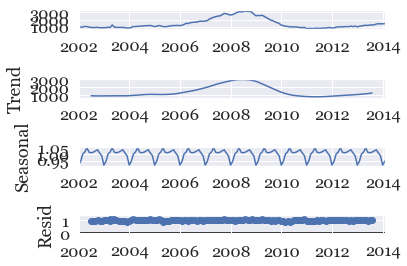

In [21]:
df_list[0].set_index('Period', inplace=True)

analysis = df_list[0][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[0])
decompose_result_mult.plot();

#### Fig. 12: Modeling: Office

Office


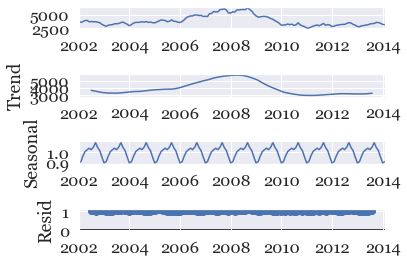

In [22]:
df_list[1].set_index('Period', inplace=True)

analysis = df_list[1][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[1])
decompose_result_mult.plot();

<a id='com'></a>

#### Fig. 13: Modeling: Commercial
[Back to the Top](#conclusion)

Commercial


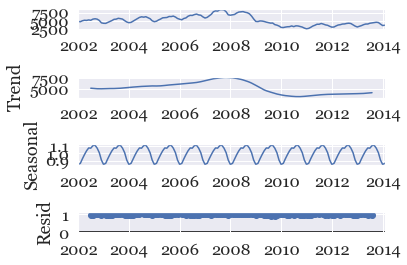

In [23]:
df_list[2].set_index('Period', inplace=True)

analysis = df_list[2][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[2])
decompose_result_mult.plot();

#### Fig. 14: Modeling: Health Care

Health_Care


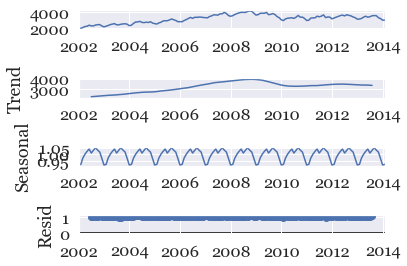

In [24]:
df_list[3].set_index('Period', inplace=True)

analysis = df_list[3][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[3])
decompose_result_mult.plot();

<a id='ed'></a>

#### Fig. 15: Modeling: Educational
[Back to the Top](#conclusion)

Educational


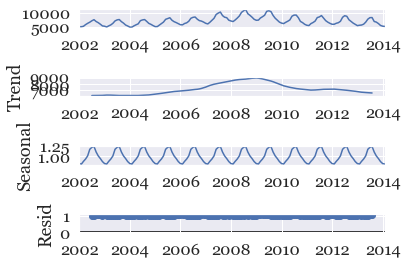

In [25]:
df_list[4].set_index('Period', inplace=True)

analysis = df_list[4][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[4])
decompose_result_mult.plot();

<a id='rel'></a>

#### Fig. 16: Modeling: Religious
[Back to the Top](#conclusion)

Religious


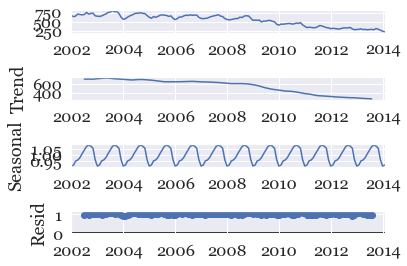

In [26]:
df_list[5].set_index('Period', inplace=True)

analysis = df_list[5][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[5])
decompose_result_mult.plot();

#### Fig. 17: Modeling: Public Safety

Public_Safety


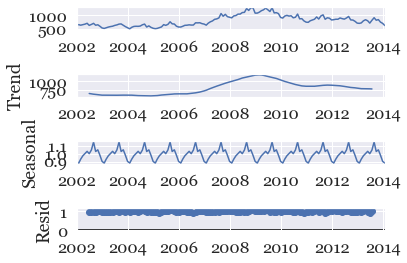

In [27]:
df_list[6].set_index('Period', inplace=True)

analysis = df_list[6][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[6])
decompose_result_mult.plot();

#### Fig. 18: Modeling: Amusement and Recreation

Amusement_and_Recreation


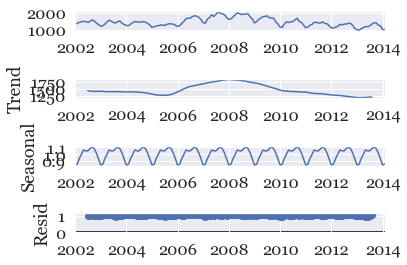

In [28]:
df_list[7].set_index('Period', inplace=True)

analysis = df_list[7][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[7])
decompose_result_mult.plot();

<a id='trans'></a>

#### Fig. 19: Modeling: Transportation
[Back to the Top](#conclusion)

Transportation


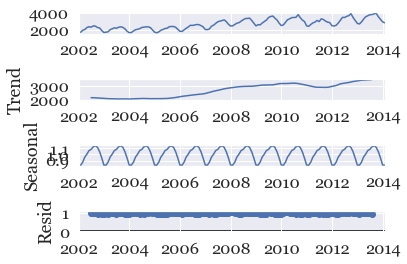

In [29]:
df_list[8].set_index('Period', inplace=True)

analysis = df_list[8][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[8])
decompose_result_mult.plot();

#### Fig. 20: Modeling: Communication

Communication


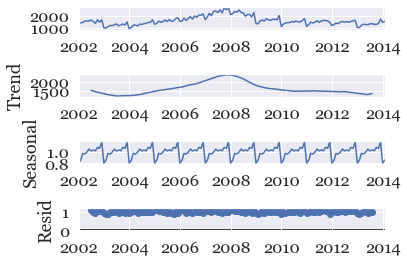

In [30]:
df_list[9].set_index('Period', inplace=True)

analysis = df_list[9][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[9])
decompose_result_mult.plot();

<a id='pwr'></a>

#### Fig. 21: Modeling: Power
[Back to the Top](#conclusion)

Power


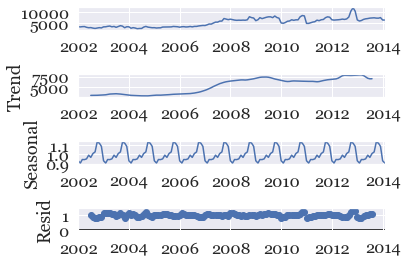

In [31]:
df_list[10].set_index('Period', inplace=True)

analysis = df_list[10][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[10])
decompose_result_mult.plot();

<a id='hs'></a>

#### Fig. 22: Modeling: Highway and Street
[Back to the Top](#conclusion)

Highway_and_Street


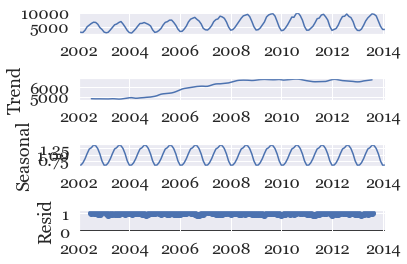

In [32]:
df_list[11].set_index('Period', inplace=True)

analysis = df_list[11][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[11])
decompose_result_mult.plot();

#### Fig. 23: Modeling: Sewage and Waste Disposal

Sewage_and_Waste_Disposal


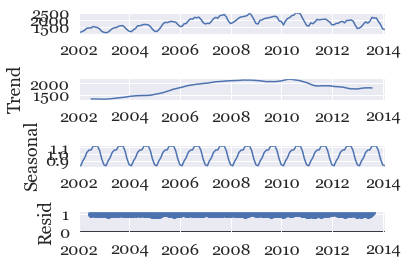

In [33]:
df_list[12].set_index('Period', inplace=True)

analysis = df_list[12][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[12])
decompose_result_mult.plot();

#### Fig. 24: Modeling: Water Supply

Water_Supply


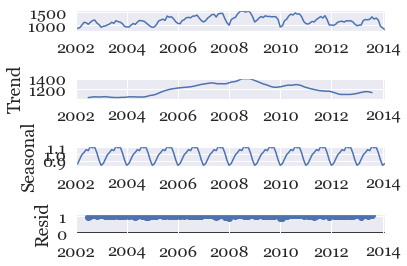

In [34]:
df_list[13].set_index('Period', inplace=True)

analysis = df_list[13][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[13])
decompose_result_mult.plot();

#### Fig. 25: Modeling: Conservation and Development

Conservation_and_Development


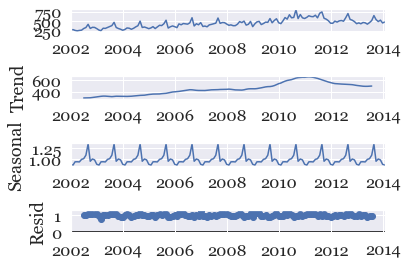

In [35]:
df_list[14].set_index('Period', inplace=True)

analysis = df_list[14][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[14])
decompose_result_mult.plot();

#### Fig. 26: Modeling: Manufacturing

Manufacturing


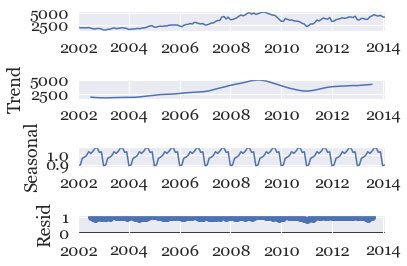

In [36]:
df_list[15].set_index('Period', inplace=True)

analysis = df_list[15][['Dollar']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
print(label_list[15])
decompose_result_mult.plot();